In [38]:
# 1st Capstone Project
# Web Scraping Project
# I have select HP store website because I am using office laptop. Ecommere websites are restricted.
# URL : https://store.hp.com/in-en/default/laptops-tablets/personal-laptops/student-laptops.html
# Problem Statement: My Project Goal is by using Web scrapping with Python to find out the
# best laptop for student by considering key factors like budget amount, processor, OS.  

import requests  # Requests is a Python HTTP library, allows you to send HTTP requests.
import pandas as pd   # For data manipulation and analysis.
from bs4 import BeautifulSoup  # for pulling data out of HTML and XML files. 

import matplotlib.pyplot as plt   # keeps track of the current figure and plotting
import seaborn as sns              # used for visualize
%matplotlib inline                  # Visaulization


In [2]:
# The data that we extract is unstructured data. So we’ll create empty lists to store them in a structured form.
name=[] #List to store name of the product
prices=[] #List to store price of the product
ratings=[] #List to store rating of the product
df=pd.DataFrame()


In [3]:
# Step1 : Find the URL that you want to scrape
# For this example, we are going to scrape the hp website to extract the Name, Price... of laptops. 
# The URL for this page is HP store.
url="https://store.hp.com/in-en/default/laptops-tablets/personal-laptops/student-laptops.html"


In [4]:
page=requests.get(url)
html=page.content

In [5]:
response=requests.get(url)

In [6]:
response

<Response [200]>

In [7]:
# Step2:Inspecting the page

soup=BeautifulSoup(response.text,"html.parser")

In [8]:
main_box=soup.find_all("div",{"class":"product details product-item-details"})

In [9]:
len(main_box)

12

In [10]:
box=main_box[0]

In [11]:
box

<div class="product details product-item-details">
<div class="product-reviews" data-bv-average-overall-rating="2.0000">
<div class="bv_reviews" data-bv-product-id="242D3PA" data-bv-productid="242D3PA" data-bv-redirect-url="https://store.hp.com/in-en/default/laptops/personal-laptops/student-laptops/hp-laptop-pc-15-da3001tu-242d3pa.html#bv_reviews" data-bv-show="inline_rating"></div> </div>
<strong class="product name product-item-name">
<a class="product-item-link" href="https://store.hp.com/in-en/default/laptops/personal-laptops/student-laptops/hp-laptop-pc-15-da3001tu-242d3pa.html">
                                HP Laptop 15-da3001TU                            </a>
</strong>
<div style="clear: both;"></div>
<!--<div class="product-short-desc">
                                                    </div>-->
<div class="product-desc-features">
<ul>
<li class="processorfamily">10th Generation Intel® Core™ i3 processor</li>
<li class="osinstalled">Windows 10 Home 64</li>
<li class="displ

In [12]:
#Step3 : Run the code and Extract the data

In [13]:
title=box.findAll('div',{'class':'price-title'})[0].text
price=box.findAll('span',{'class':'price'})[1].text
rating=box.findAll('div',{'class':'bv_reviews'})
#rating

In [14]:
print(title,'\n',price,'\n',rating)

Starting from 
 ₹34,649 
 [<div class="bv_reviews" data-bv-product-id="242D3PA" data-bv-productid="242D3PA" data-bv-redirect-url="https://store.hp.com/in-en/default/laptops/personal-laptops/student-laptops/hp-laptop-pc-15-da3001tu-242d3pa.html#bv_reviews" data-bv-show="inline_rating"></div>]


In [15]:
data_list = []

for box in main_box:
    temp_dict={}
    temp_dict['TITLE'] = box.findAll('a',{'class':'product-item-link'})[0].text
    #temp_dict['DESCRIPTION'] = box.findAll('div',{'class':'product-desc-features'})[0].text
    processorfamily = box.findAll('li',{'class':'processorfamily'})
    if(len(processorfamily)>0):
        temp_dict['processorfamily'] = box.findAll('li',{'class':'processorfamily'})[0].text
    else:
        temp_dict['processorfamily'] = ''
    
    osinstalled = box.findAll('li',{'class':'osinstalled'})
    
    if(len(osinstalled)>0):
        temp_dict['osinstalled'] = box.findAll('li',{'class':'osinstalled'})[0].text
    else:
        temp_dict['osinstalled'] = ''
        
    
    
        
        
    
   
    price_arr = box.findAll('span',attrs={'class':'price'})
    if(len(price_arr)>1):
        temp_dict['PRICE'] = box.findAll('span',attrs={'class':'price'})[1].text
    else:
        temp_dict['PRICE'] = box.findAll('span',attrs={'class':'price'})[0].text 
        
    
    #temp_dict['RATING'] = box.findAll('div',{'class':'product-reviews'})[0].text
    data_list.append(temp_dict)
    
 

In [16]:
df=pd.DataFrame(data_list)

In [17]:
print(df.head(30))

                                                TITLE  \
0   \n                                HP Laptop 15...   
1   \n                                HP Laptop - ...   
2   \n                                HP Chromeboo...   
3   \n                                HP Laptop 14...   
4   \n                                HP Chromeboo...   
5   \n                                HP Laptop 15...   
6   \n                                HP Laptop 15...   
7   \n                                HP Laptop 14...   
8   \n                                HP Notebook ...   
9   \n                                HP Laptop 15...   
10  \n                                HP Laptop - ...   
11  \n                                HP Notebook ...   

                              processorfamily  \
0   10th Generation Intel® Core™ i3 processor   
1   10th Generation Intel® Core™ i3 processor   
2                   Intel® Celeron® processor   
3   11th Generation Intel® Core™ i3 processor   
4            

In [18]:
df['PRICE'] = df['PRICE'].str.lstrip('₹')

34649


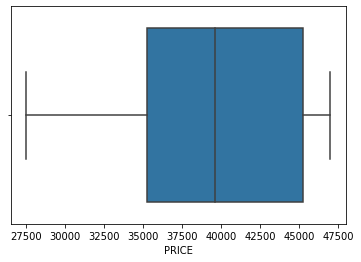

In [19]:
df['PRICE'] = df['PRICE'].replace({',':''}, regex=True)
print(df['PRICE'][0])
import numpy as np
import seaborn as sns
df['PRICE'] = df['PRICE'].astype(np.float)
sns.boxplot(x=df['PRICE'])

In [20]:
min(df['PRICE'])

27499.0

In [23]:
# Budget of purchase laptop between 35000 and 40000
rslt_df = df[(df['PRICE'] > 35000) & (df['PRICE'] < 40000)] 

In [24]:
rslt_df

,TITLE,processorfamily,osinstalled,PRICE
1,\n HP Laptop - ...,10th Generation Intel® Core™ i3 processor,Windows 10 Home Single Language 64,37999.0
8,\n HP Notebook ...,AMD Ryzen™ 3 processor,Windows 10 Home Single Language 64,35499.0
9,\n HP Laptop 15...,10th Generation Intel® Core™ i3 processor,Windows 10 Home 64,38519.0


In [ ]:
##### Budget of purchase laptop between 25000 and 50000
rslt_df = df[(df['PRICE'] > 25000) & (df['PRICE'] < 50000)] 

In [26]:
rslt_df

,TITLE,processorfamily,osinstalled,PRICE
0,\n HP Laptop 15...,10th Generation Intel® Core™ i3 processor,Windows 10 Home 64,34649.0
1,\n HP Laptop - ...,10th Generation Intel® Core™ i3 processor,Windows 10 Home Single Language 64,37999.0
2,\n HP Chromeboo...,Intel® Celeron® processor,Chrome OS™,33499.0
3,\n HP Laptop 14...,11th Generation Intel® Core™ i3 processor,Windows 10 Home 64,46999.0
4,\n HP Chromeboo...,Intel® Celeron® processor,Chrome OS™,27499.0
5,\n HP Laptop 15...,AMD Ryzen™ 5 processor,Windows 10 Home Single Language 64,44999.0
6,\n HP Laptop 15...,AMD Ryzen™ 5 processor,Windows 10 Home 64,41579.0
7,\n HP Laptop 14...,10th Generation Intel® Core™ i3 processor,Windows 10 Home 64,45999.0
8,\n HP Notebook ...,AMD Ryzen™ 3 processor,Windows 10 Home Single Language 64,35499.0
9,\n HP Laptop 15...,10th Generation Intel® Core™ i3 processor,Windows 10 Home 64,38519.0


Text(0.5, 1.0, 'Price vs TITLE')

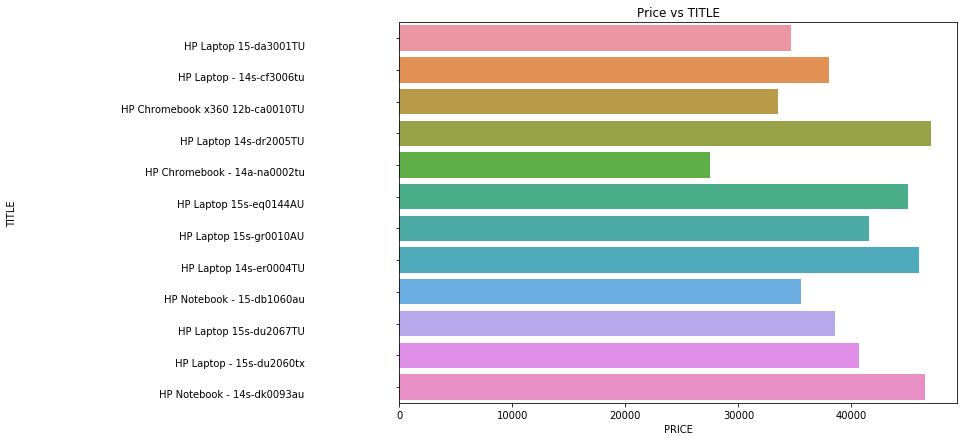

In [39]:
# Visualizing Basic Analysis
plt.figure(figsize=(10,7))
sns.barplot(x=rslt_df['PRICE'],y=rslt_df['TITLE'])
plt.title("Price vs TITLE")

Text(0.5, 1.0, 'Boxplot')

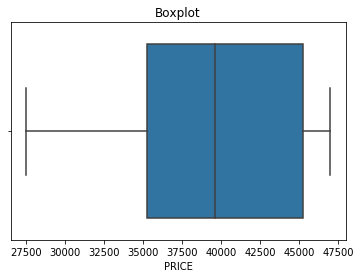

In [40]:
sns.boxplot(x=rslt_df['PRICE'])
plt.title("Boxplot")

In [ ]:
#Thank You